In [1]:
# For Data

from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import CryptoHistoricalDataClient, StockHistoricalDataClient

#from Data.historical_data import Historical_data
import pandas as pd
from Preprocessing.preprocessing import preprocessing
from Models.LSTM.lightningLSTM import LightningLSTM
import torch
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from Preprocessing.dataclasses import StockPriceDataModule, StockDataset
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping, TQDMProgressBar, StochasticWeightAveraging
import matplotlib.pyplot as plt
import numpy as np 

from Evaluation import evaluation_plots

In [4]:
trained_model = LightningLSTM.load_from_checkpoint("checkpoints\\best_checkpoint3-v13.ckpt",input_size=8, hidden_size = 500, num_layers = 1)
trained_model.freeze()


df = pd.read_csv('Data\Stock\StockBars\MSFT_Minute')
train_size = 0.9
lag = 1
sequence_length = 100
df_shorter = df[:int(len(df)*0.4)]

data_train, data_test, scaler = preprocessing(df = df_shorter, lag = lag, sequence_length=sequence_length, dif_all=True, train_size=train_size )

test = StockDataset(data_test)

predictions = []
labels = []

for item in test:
  sequence = item["sequence"]
  label = item['label']

  _, output = trained_model(sequence.unsqueeze(dim=0))
  predictions.append(float(output.numpy()[0]))
  labels.append(float(label.numpy()))

RuntimeError: input.size(-1) must be equal to input_size. Expected 8, got 9

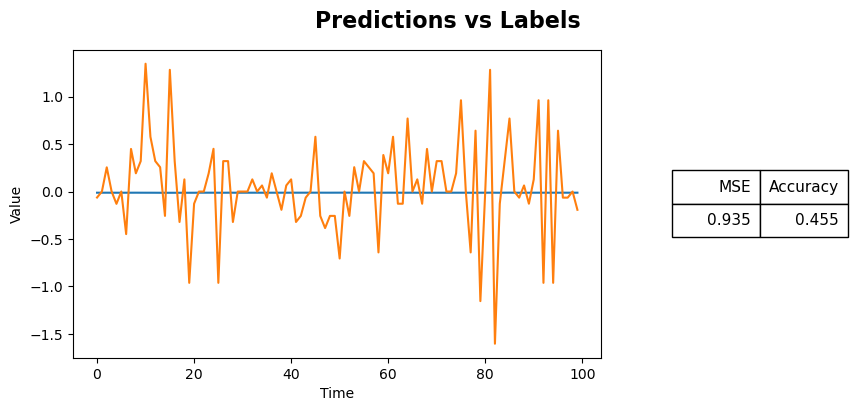

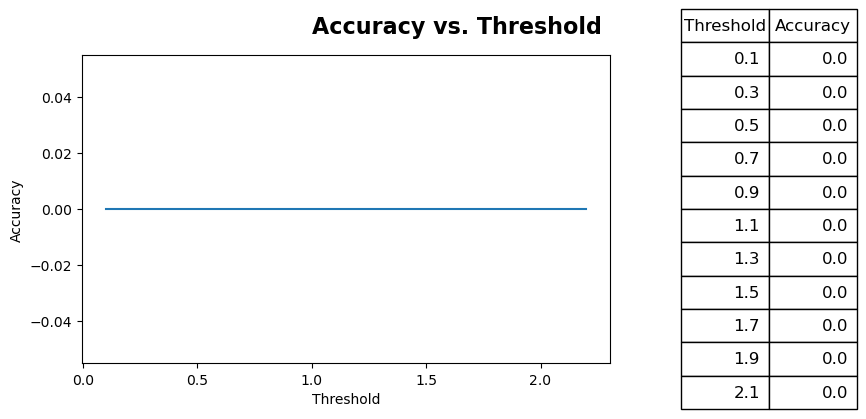

In [ ]:
#evaluation_plots.plot_predictions_vs_labels(predictions_reversed, labels_reversed)
evaluation_plots.plot_predictions_vs_labels(predictions, labels)
evaluation_plots.plot_accuracy_vs_threshold(predictions, labels, increments=0.1, threshold_value=2.2)